In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , AveragePooling2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras import backend

In [3]:
train_path = "train/"
val_path = "val/"
test_path = "test/"

image_w = 128
image_h = 128
stride = (3,3)
pool = (2,2)
batch_size = 100
if backend.image_data_format() == "channels_first":
    input_shape = (3 , image_w , image_h)
else:
    input_shape = (image_w , image_h , 3)

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
train_generator.class_indices

Found 5216 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

In [6]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
val_generator.class_indices

Found 16 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
test_generator.class_indices

Found 624 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

In [8]:
model = Sequential()

model.add( Conv2D(32 , stride , padding="same" , activation="relu" , input_shape=input_shape) )
model.add( BatchNormalization() )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(64 , stride , padding="same" , activation="relu") )
model.add( Dropout(.2) )
model.add( BatchNormalization() )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(128 , stride , padding="same" , activation="relu") )
model.add( Dropout(.2) )
model.add( BatchNormalization() )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(128 , stride , padding="same" , activation="relu") )
model.add( Dropout(.2) )
model.add( BatchNormalization() )
model.add( MaxPooling2D(pool_size=pool) )
model.add( Flatten() )
model.add( Dropout(.2) )

model.add( Dense(512 , activation="relu") )
model.add( Dropout(.2) )

model.add( Dense(1 , activation="sigmoid") )

model.compile(optimizer="rmsprop" , loss="binary_crossentropy" , metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [41]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/50
53/53 [==============================] - 123s 2s/step - loss: 0.8715 - accuracy: 0.7168 - val_loss: 0.6527 - val_accuracy: 0.6250
Epoch 2/50
53/53 [==============================] - 113s 2s/step - loss: 0.5032 - accuracy: 0.7429 - val_loss: 0.7659 - val_accuracy: 0.6250
Epoch 3/50
53/53 [==============================] - 127s 2s/step - loss: 0.4467 - accuracy: 0.7628 - val_loss: 0.5139 - val_accuracy: 0.7308
Epoch 4/50
53/53 [==============================] - 126s 2s/step - loss: 0.3917 - accuracy: 0.8177 - val_loss: 0.5510 - val_accuracy: 0.7724
Epoch 5/50
53/53 [==============================] - 126s 2s/step - loss: 0.3487 - accuracy: 0.8432 - val_loss: 0.5815 - val_accuracy: 0.7917
Epoch 6/50
53/53 [==============================] - 122s 2s/step - loss: 0.3329 - accuracy: 0.8484 - val_loss: 0.3606 - val_accuracy: 0.8285
Epoch 7/50
53/53 [==============================] - 126s 2s/step - loss: 0.3254 - accuracy: 0.8616 - val_loss: 0.3635 - val_accuracy: 0.8750
Epoch 8/50
53

KeyboardInterrupt: 

In [31]:
loss, acc = model.evaluate_generator(test_generator , verbose=1)
# model.save("unsharp_10epochs.h5")
loss , acc

Instructions for updating:
Please use Model.evaluate, which supports generators.
7/7 [==============================] - 8s 1s/step - loss: 0.4771 - accuracy: 0.8333


(0.4771369993686676, 0.8333333134651184)

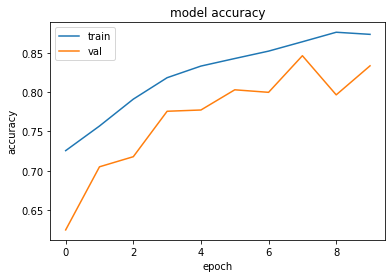

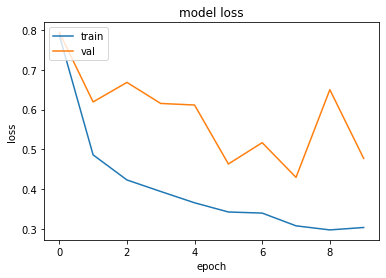

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# nothing : (0.7438372373580933, 0.682692289352417) (4 epochs)

# thresh : (0.4687788188457489, 0.7980769276618958) (4 epochs)
    
# unsharp : 
# (0.42874306440353394, 0.7852563858032227) (4 epochs)
# (0.5442628264427185, 0.807692289352417) (6 epochs)
# (0.47703200578689575, 0.8333333134651184) (8 epochs)
# (0.35110974311828613, 0.8814102411270142) (10 epochs)
# (0.3481963574886322, 0.8381410241127014) (12 epochs)
# (0.3682185709476471, 0.8685897588729858) (14 epochs)